# Assignment 7
## Due June 13th at 12:00

## Exercise 1
The objective function in logistic regression is given by

$n^{-1} \sum_{i=1}^n log(1+exp(-Y_i< w,\phi(X_i)>))$. As per the representer theorem, the optimal solution can be written as $w^* = \sum_{i=1}^n \alpha_i \phi(X_i)$.

This allows to rewrite the objective function as:

$n^{-1} \sum_{i=1}^n log(1+exp(-\sum_{j=1}^n \alpha_i Y_i<\phi(X_i), \phi(X_j)>)) = n^{-1} \sum_{i=1}^n log(1+exp(-\sum_{j=1}^n \alpha_i Y_ik_{ij}))$, where $k_{ij} = <\phi(X_i), \phi(X_j)>$, i.e., a kernel function. Hence logistic regression can be kernelized.

# Exercise 2

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [35]:
# load the training data
df = pd.read_csv('train.csv')
X_train, y_train = df[['x', 'y']].to_numpy(), df[['label']].to_numpy().flatten()

In [36]:
# Here you can inspect the data. This part will not be graded, but it is something that you should always do!
print(X_train.shape)
print(y_train.shape)

(100, 2)
(100,)


## a) Achieve zero training error


/tmp/ipykernel_42577/4118385881.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(paramgrid['C'],paramgrid['gamma'],scores==1)


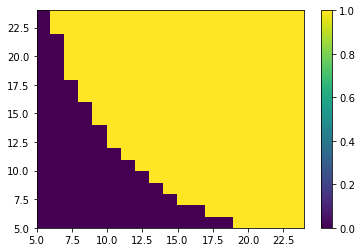

In [37]:
# put the values of hyperparameters for which overfitting happens into C and gamma
paramgrid = {'C':np.arange(5,25),'gamma':np.arange(5,25)}
scores = np.empty((len(paramgrid['C']),len(paramgrid['gamma'])))
for cix,c in enumerate(paramgrid['C']):
    for gix,g in enumerate(paramgrid['gamma']):
        scores[cix,gix] = SVC(kernel='rbf',C=c,gamma=g).fit(X_train,y_train).score(X_train, y_train)

plt.pcolor(paramgrid['C'],paramgrid['gamma'],scores==1)
plt.colorbar()


In [38]:
C = 11
gamma = 11

overfit = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
assert overfit.score(X_train, y_train) == 1.

- **Qualitatively, what is the range of hyperparameters for which interpolation happens?:** 
    the svm interpolates roughly when C and gamma are both greater than 11, but they can compensate each other (e.g., at gamma = 20 and alpha = 5, the svm also interpolates, see figure above)

## b) Assuming that the kernel matrix is of full rank, can kernel SVM achieve zero training error on any dataset? Explain.

the RBF kernel is a so-called universal Kernel, i.e., it can approximate any continuous function. A kernel SVM with a universal kernel such as RBF can, therefore, achieve zero training data on any dataset.

# c) Now use cross-validation to obtain reasonable values for all hyperparameters.

In [39]:
# again, put the values of hyperparameters that you would choose into C and gamma
C = 15
gamma = 2
paramgrid = {'C':np.arange(1,25),'gamma':np.arange(1,25)}
cv = GridSearchCV(SVC(kernel='rbf'),param_grid = paramgrid).fit(X_train,y_train)
print(f'optimal params: {cv.best_params_}')
print(f'minimal training error: {1-cv.best_score_}')

optimal params: {'C': 15, 'gamma': 2}
minimal training error: 0.010000000000000009


In [40]:
# after cross-validation, load the test data
df = pd.read_csv('test.csv')
X_test, y_test = df[['x', 'y']].to_numpy(), df[['label']].to_numpy().flatten()

In [41]:
cross_validated = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
print('train accuracy is ', cross_validated.score(X_train, y_train))
print('test accuracy is ', cross_validated.score(X_test, y_test))
assert cross_validated.score(X_test, y_test) >= 0.95

train accuracy is  0.99
test accuracy is  0.98


# d) Plot the decision boundary of your classifiers together with the datapoints.

In [42]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy,colmap=plt.cm.coolwarm, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=colmap,**params)
    return out

## Plot the decision boundary of your overfit classifier

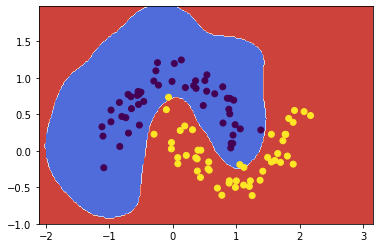

In [43]:
fig,ax = plt.subplots()
plot_contours(ax,overfit,*make_meshgrid(X_test,y_test))
ax.scatter(X_test[:,0],X_test[:,1],c=y_test)

## Plot the decision boundary of your cross-validated classifier

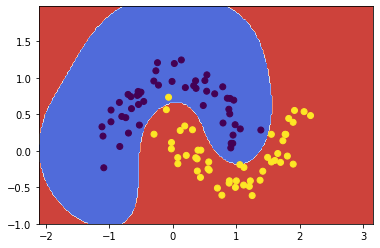

In [44]:
fig,ax = plt.subplots()
plot_contours(ax,cross_validated,*make_meshgrid(X_test,y_test))
ax.scatter(X_test[:,0],X_test[:,1],c=y_test)

#decision boundary for cross-validated classifier looks less wiggly

# e) Play around with hyperparametes and kernels

train accuracy is  0.6
test accuracy is  0.64


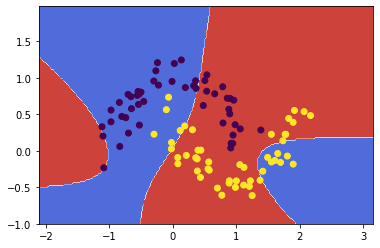

In [45]:
# train a classifier for your choice of kernel and hyperparameters 
other_kernel = SVC(kernel='sigmoid', C=C, gamma=gamma).fit(X_train, y_train)
print('train accuracy is ', other_kernel.score(X_train, y_train))
print('test accuracy is ', other_kernel.score(X_test, y_test))

fig,ax = plt.subplots()
plot_contours(ax,other_kernel,*make_meshgrid(X_test,y_test))
ax.scatter(X_test[:,0],X_test[:,1],c=y_test)


#linear kernel performs relatively poorly
#second-degree polynomial is even worse
# third-degree polynomial is slightly better
#sigmoid kernel is very bad

### Addition: Kernel Ridge Regression also works. The Laplacian kernel (arguably) performs best.

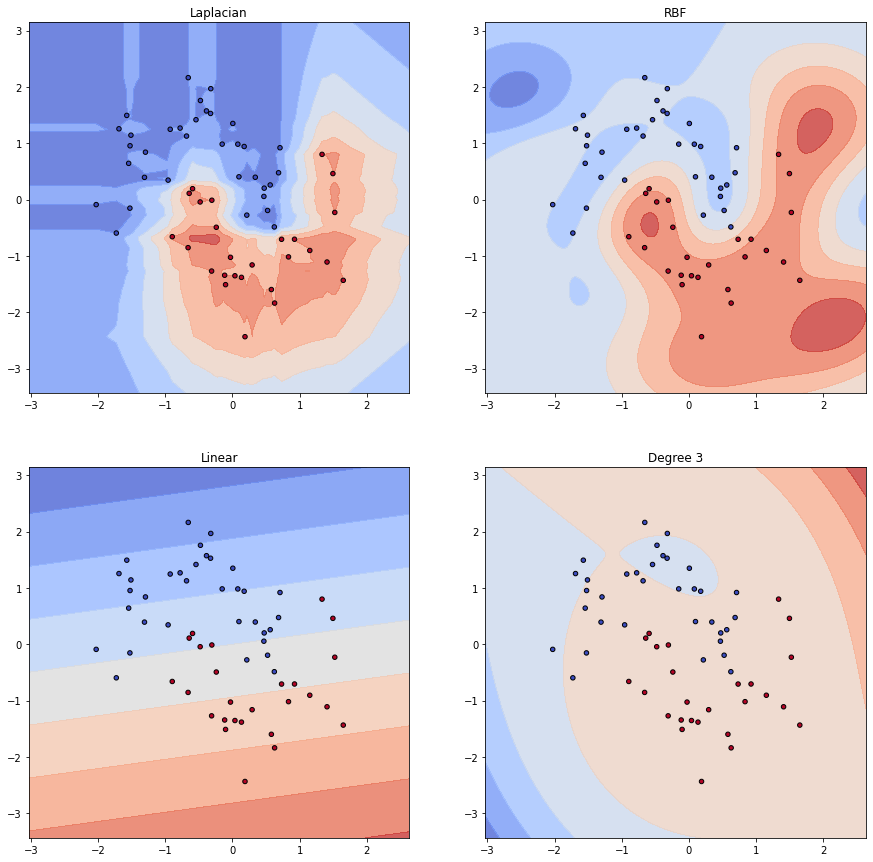

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler

X, y = make_moons(noise=0.2, random_state=1) #factor=0.5,
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

parameters = {'alpha': np.logspace(-3, 2, num=10), 'gamma': np.logspace(-3, 2, num=10)}

kr = KernelRidge(kernel='laplacian')
clf_kr = GridSearchCV(kr, parameters)
clf_kr = clf_kr.fit(X_train, y_train)

kr_rbf = KernelRidge(kernel='rbf')
clf_rbf = GridSearchCV(kr_rbf, parameters)
clf_rbf = clf_rbf.fit(X_train, y_train)

kr_lin = KernelRidge(kernel='linear')
clf_lin = GridSearchCV(kr_lin, parameters)
clf_lin = clf_lin.fit(X_train, y_train)

kr_p = KernelRidge(kernel='polynomial', degree=3)
clf_p = GridSearchCV(kr_p, parameters)
clf_p = clf_p.fit(X_train, y_train)



fig, ax = plt.subplots(2, 2, figsize=(15,15))
plot_contours(ax[0,0], clf_kr, xx, yy, colmap=plt.cm.coolwarm, alpha=0.8)
ax[0,0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax[0,0].set_title('Laplacian')

plot_contours(ax[0,1], clf_rbf, xx, yy, colmap=plt.cm.coolwarm, alpha=0.8)
ax[0,1].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax[0,1].set_title('RBF')

plot_contours(ax[1,0], clf_lin, xx, yy, colmap=plt.cm.coolwarm, alpha=0.8)
ax[1,0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax[1,0].set_title('Linear')

plot_contours(ax[1,1], clf_p, xx, yy, colmap=plt.cm.coolwarm, alpha=0.8)
ax[1,1].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax[1,1].set_title('Degree 3')

plt.show()

# Assignment 7 - Exercise 3

## a) Complete the implementation of kernel_regression and random_feature_regression

In [80]:
def arccosine_kernel(x1,x2):
    out = np.empty((x1.shape[0],x2.shape[0]))
    for i1 in range(x1.shape[0]):
        for i2 in range(x2.shape[0]):
            u = (x1[i1,:]@x2[i2,:].T)/(np.linalg.norm(x1)*np.linalg.norm(x2))
            out[i1,i2] = (1/np.pi)*u*(np.pi - np.arccos(u) + np.sqrt((1-u**2)))

    return out



def kernel_regression(X_train, Y_train):
    K = arccosine_kernel(X_train, X_train)
    alpha = np.linalg.inv(K)@Y_train

    def kernel_predictor(x):
        prediction = alpha.T@arccosine_kernel(X_train,x)
        return prediction.T
    return kernel_predictor


def apply_random_relu(X, l):
    W=  np.random.multivariate_normal(np.zeros((X.shape[1],)),np.eye(X.shape[1]),size=l)
    out=(1/np.sqrt(l)) * X@W.T

    return np.maximum(0,out)

def random_feature_regression(X_train, Y_train, l):
    phi_W_X = apply_random_relu(X_train,l)
    alpha = np.linalg.inv(phi_W_X.T@phi_W_X) @ phi_W_X.T @ Y_train

    norm = np.linalg.norm(alpha)/np.sqrt(X_train.shape[1])
    def random_feature_predictor(x):
        prediction = apply_random_relu(x,l)@alpha
        return prediction
    return random_feature_predictor, norm




## b) Plot train error, test error, and the function norm of random feature regression for multiple overparameterization ratios.

In [81]:
def generate_data(num_samples, dim):
    X = np.random.standard_normal((num_samples, dim))
    regression_param = np.random.standard_normal((dim, 1))
    regression_param /= np.linalg.norm(regression_param)
    noise = 0.2 * np.random.standard_normal((num_samples, 1))
    Y = X @ regression_param + noise
    return X, Y

In [82]:
X, Y = generate_data(num_samples=600, dim=50)
X_train, Y_train = X[:300], Y[:300]
X_test, Y_test = X[300:], Y[300:]

In [83]:
kern =  kernel_regression(X_train, Y_train)
train_err_kernel = np.mean((kern(X_train)-Y_train)**2)
test_err_kernel = np.mean((kern(X_test)-Y_test)**2)

overparam_ratios = np.linspace(.001, 4, 60)
test_errs = np.empty_like(overparam_ratios)
train_errs = np.empty_like(overparam_ratios)
norms = np.empty_like(overparam_ratios)

for i,o in enumerate(overparam_ratios):
    l = int(np.ceil(X_train.shape[0]*o))
    kern, norm =  random_feature_regression(X_train, Y_train,l)
    norms[i] = norm
    train_errs[i] = np.mean((kern(X_train)-Y_train)**2)
    test_errs[i] = np.mean((kern(X_test)-Y_test)**2)



[]

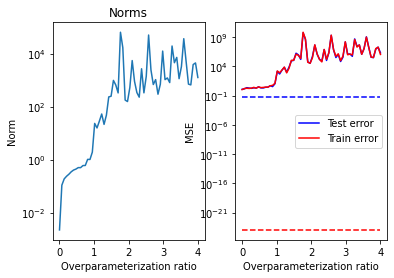

In [87]:
fig,ax = plt.subplots(1,2)
ax[0].plot(overparam_ratios, norms)
ax[0].set_title("Norms")
ax[0].set_xlabel("Overparameterization ratio")
ax[0].set_ylabel("Norm")
ax[0].semilogy()

ax[1].plot(overparam_ratios, test_errs, 'b',label="Test error")
ax[1].plot(overparam_ratios, [test_err_kernel]*len(overparam_ratios),'--b')
ax[1].plot(overparam_ratios, train_errs, 'r',label="Train error")
ax[1].plot(overparam_ratios, [train_err_kernel]*len(overparam_ratios),'--r')
ax[1].set_xlabel("Overparameterization ratio")
ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].semilogy()

## c) Discuss the results

Overall, kernel regression outperforms random feature regression. At the interpolation threshold (gamma = 1), random feature regression displays a strange behavior, with errors going up and showing very high, seemingly random peaks. An additional inductive bias with random feature regression might come from the fact that features can be meaningfully mixed by a randomized linear map.

## d) Complete the implementation of nadaraya_watson_regression and visualize the resulting predictor.

In [101]:
def singular_kernel(x1,x2):
    out = np.empty((x1.shape[0],x2.shape[0]))
    for i1 in range(x1.shape[0]):
        for i2 in range(x2.shape[0]):
            out[i1,i2] = 1/np.linalg.norm(x1[i1]-x2[i2])

    return out

def nadaraya_watson_regression(X_train, Y_train, m):
    def nw_predictor(x):
        prediction=np.empty_like(x)
        K = singular_kernel(x, X_train)
        for i in range(x.shape[0]):
            
            if np.any(np.isinf(K[i,:])):
                idx = np.argsort(K[i,:])[-(m+1):-1]
            else:
                idx = np.argsort(K[i,:])[-m:]
    
            prediction[i] = ( K[i,idx]@Y_train[idx] )/np.sum(K[i,idx])
        return prediction
    return nw_predictor


In [102]:
def generate_1d_data(num_samples):
    x = np.random.uniform(0, 1, (num_samples, 1))
    noise = .1 * np.random.standard_normal((num_samples, 1))
    y = x + noise
    return x, y

/tmp/ipykernel_42577/2632316687.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  out[i1,i2] = 1/np.linalg.norm(x1[i1]-x2[i2])


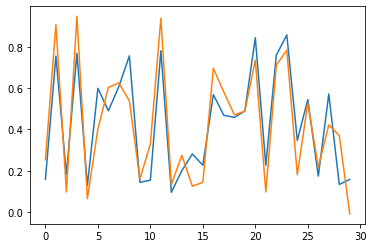

In [103]:
X, Y = generate_1d_data(num_samples=30)
grid = np.linspace(0, 1, 1000)

pred = nadaraya_watson_regression(X,Y,10)
plt.figure()
plt.plot(pred(X))
plt.plot(Y)


## Exercise 4 (competition)

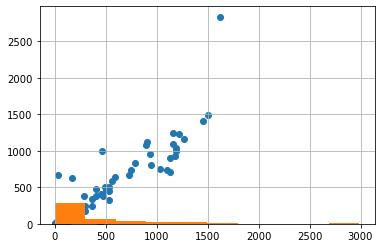

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("geneexp.csv")

#split into evaluation set and work set (for which target value is known)
evalset, workset = df.loc[df.GXYLT1 == -1,:], df.loc[df.GXYLT1 != -1,:]

#visualize target variable
plt.figure()
workset.GXYLT1.hist()

#split workset into X and y, hold out test set
X, y = workset.drop("GXYLT1",axis=1).to_numpy(), workset.GXYLT1.to_numpy()
X_eval = evalset.drop("GXYLT1",axis=1).to_numpy()

#plot histogram
plt.hist(y)
#the target values have many 0 values, wich might be a problem for parametric regression methods.
#try out nonparametric random-forest regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf=RandomForestRegressor()
plt.scatter(rf.fit(X_train,y_train).predict(X_test),y_test)
#result looks decent

#refit on whole workset, predict missing samples
df.loc[df.GXYLT1 == -1,"GXYLT1"] = rf.fit(X,y).predict(X_eval)

df.to_csv("geneexp_prediction.csv")
